In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from pipe_fn import infix, and_then
from linq.standard.general import Each

In [2]:
samples = data.stereo_motorcycle()

shape:  (500, 741, 3)


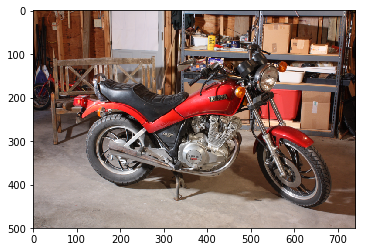

shape:  (500, 741, 3)


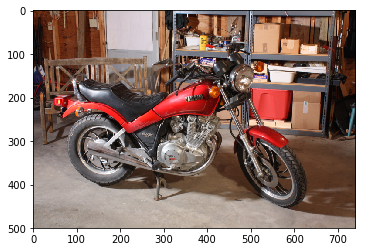

shape:  (500, 741)


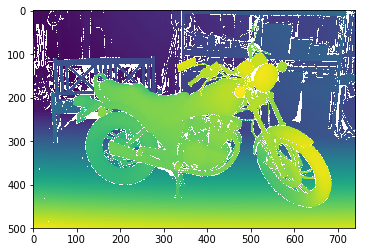

In [3]:
samples | infix/Each@and_then(lambda x: print('shape: ', x.shape) or x, plt.imshow, plt.show) 
# 将三张图片依次画图并显示出来

In [4]:
prewitt = np.array([
        -1, 0, 1,
        -1, 0, 1,
        -1, 0, 1]).reshape((3, 3))
laplace = np.array([
        0,  1, 0,
        1, -4, 1,
        0,  1, 0]).reshape((3, 3))

diff2 = -laplace

# sobel算子使用scipy.ndimage中的实现

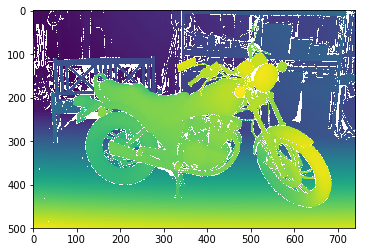

In [5]:
from scipy.signal import convolve2d
img = samples[2]  # 取灰度图
plt.imshow(img)
plt.show()

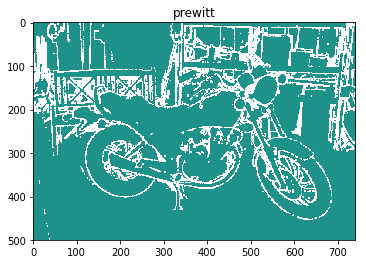

In [6]:
res1 = convolve2d(img, prewitt, mode='same')
plt.imshow(res1)
plt.title('prewitt')
plt.show()

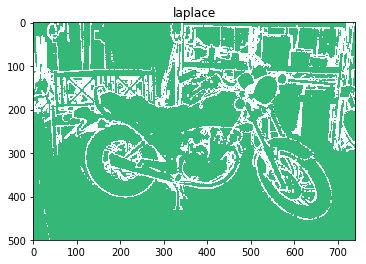

In [7]:
res2 = convolve2d(img, laplace, mode='same')
plt.imshow(res2)
plt.title('laplace')
plt.show()

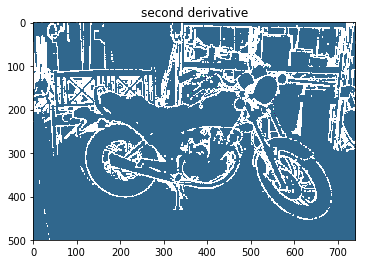

In [8]:
res3 = convolve2d(img, diff2, mode='same')
plt.imshow(res3)
plt.title('second derivative')
plt.show()

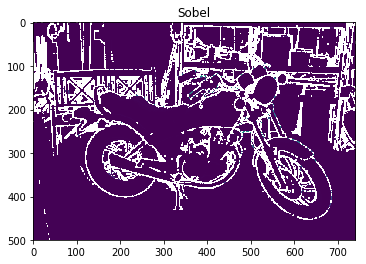

In [9]:
from scipy.ndimage import sobel
res4_x = sobel(img, axis=0, mode='constant')
res4_y = sobel(img, axis=1, mode='constant')
res4 = np.hypot(res4_x, res4_y)
plt.imshow(res4)
plt.title('Sobel')
plt.show()